<a href="https://colab.research.google.com/github/Akhror7/PredictiveModelling_ProsperLoan/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Akhror7/PredictiveModelling_ProsperLoan/main/prosperLoanData.csv')

In [42]:
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
101442,D1B935798342402908B2260,790614,2013-05-27 18:18:59.310000000,NaN,36,Current,NaN,0.14857,0.1203,0.1103,...,-61.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,72
60934,BE8A340462048538177C357,233764,2007-11-18 14:44:00.700000000,AA,36,Completed,2010-11-27 00:00:00,0.05672,0.0500,0.0500,...,0.00,0.0,0.0,0.0,0.0,1.0,9,6,3550.0,67
20363,42BB35190532896383EE5C7,512033,2011-06-16 17:33:14.707000000,NaN,36,Completed,2013-10-31 00:00:00,0.34621,0.3099,0.2999,...,-31.30,0.0,0.0,0.0,0.0,1.0,0,0,0.0,17
41264,4F6C336768643854941D835,38109,2006-09-09 18:15:46.753000000,E,36,Completed,2009-09-19 00:00:00,0.18123,0.1740,0.1690,...,-24.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,88
91725,60573560560004500F6A099,658514,2012-10-23 07:54:04.947000000,NaN,12,Completed,2013-03-25 00:00:00,0.25123,0.1730,0.1630,...,-5.81,0.0,0.0,0.0,0.0,1.0,0,0,0.0,33


In [43]:
df.shape

(113937, 81)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [45]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [46]:
cols_with_missed=df.columns[df.isnull().any()]

In [47]:
df[cols_with_missed].isnull().sum()

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

In [48]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

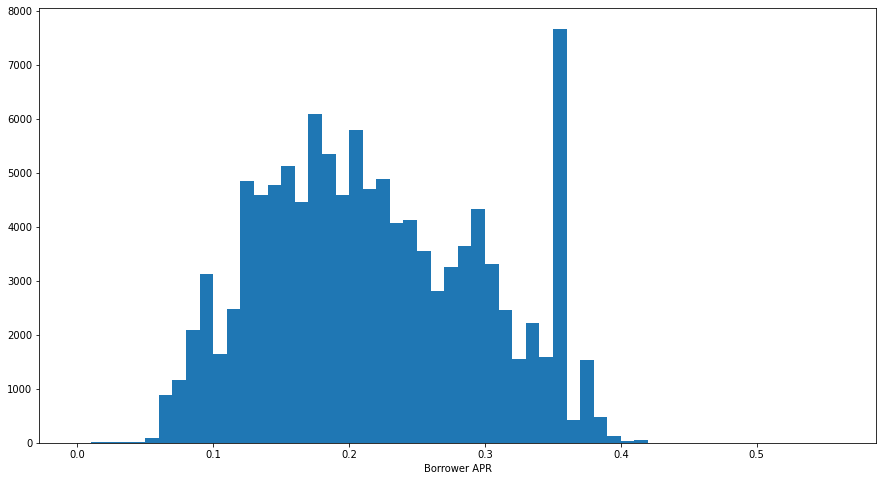

In [49]:
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[15, 8])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

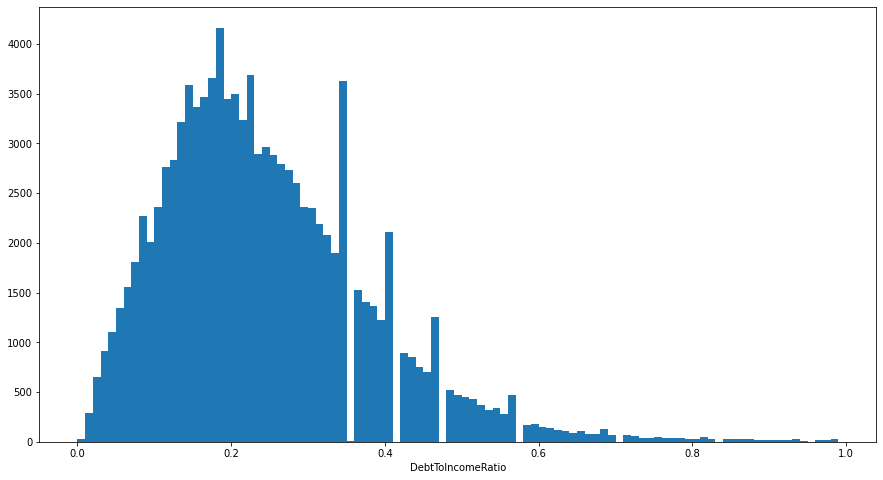

In [50]:
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[15, 8])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

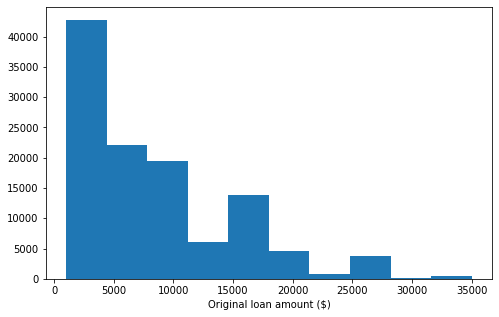

In [51]:
plt.figure(figsize=[8, 5])
plt.hist(df['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');

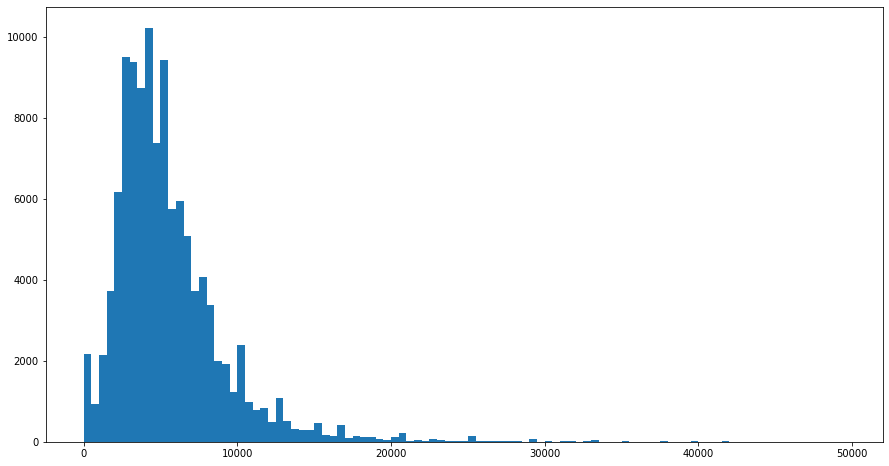

In [52]:
plt.figure(figsize=[15, 8])
bins = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins);

In [53]:
df = df[df.StatedMonthlyIncome <= 30000]

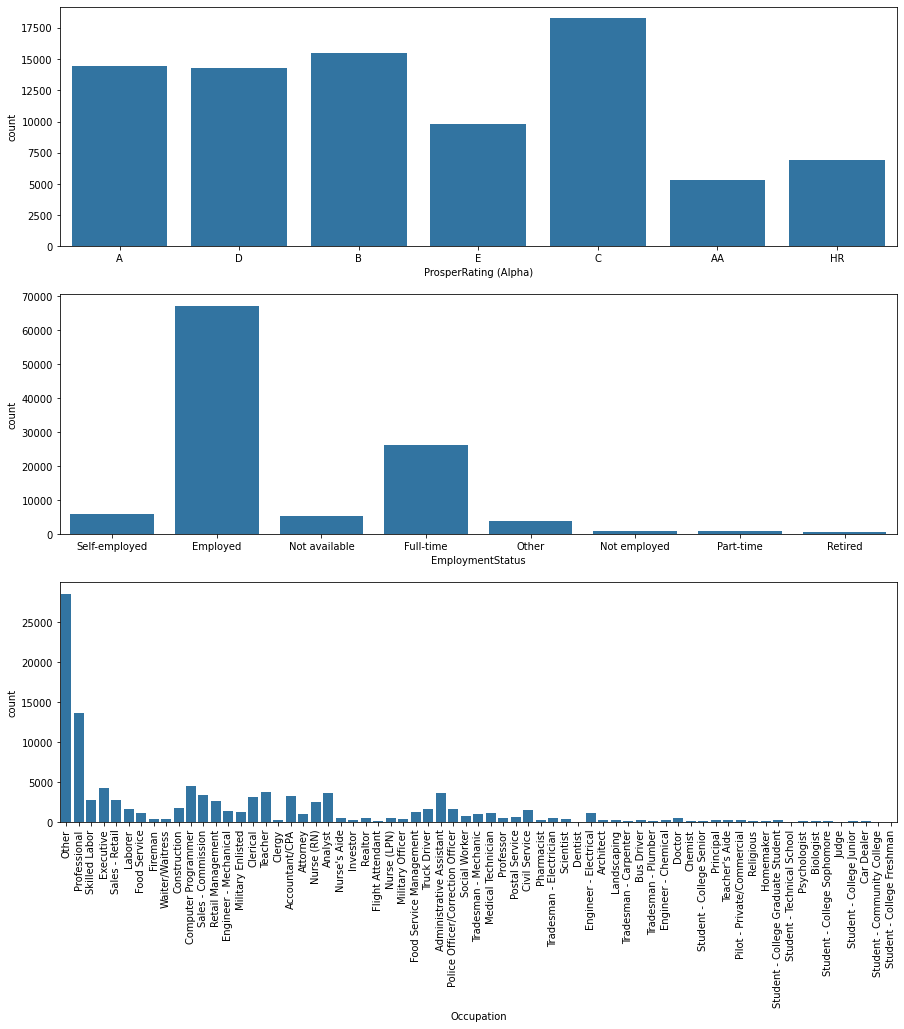

In [54]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
sns.countplot(data = df, x = 'Occupation', color = default_color, ax = ax[2]);
plt.xticks(rotation=90);

Univariate analysis 
-----------


<Figure size 576x360 with 0 Axes>

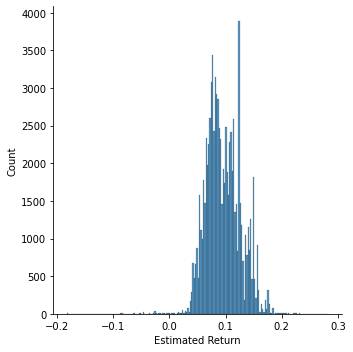

In [55]:
plt.figure(figsize = [8,5])
sns.displot(df.EstimatedReturn, kde = False, bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Count');
plt.show()


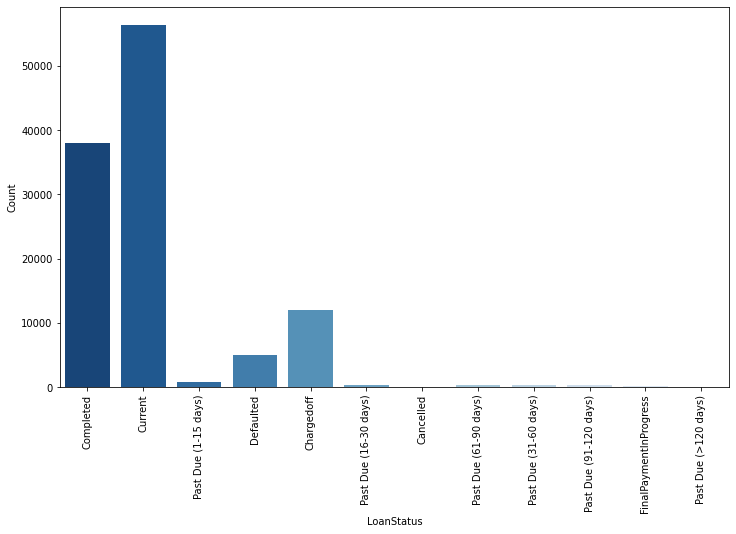

In [56]:

plt.figure(figsize = [12, 7])
sns.countplot(data = df, x = 'LoanStatus', palette = "Blues_r")
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

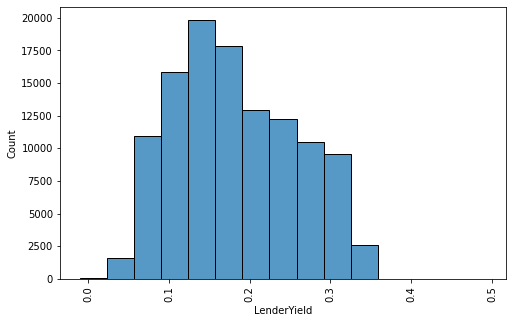

In [57]:

plt.figure(figsize = [8, 5])
sns.histplot(data = a_data, x = 'LenderYield', bins=15)
plt.xlabel('LenderYield')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

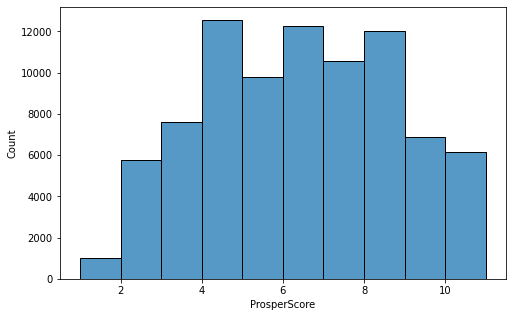

In [58]:
#visualizing of ProsperScore
plt.figure(figsize=[8,5])
sns.histplot(data=df,x='ProsperScore',bins= 10);
plt.show()